# Import packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline
from matplotlib import rcParams
rcParams["axes.formatter.useoffset"] = False
rcParams['axes.formatter.limits'] = -15,15
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
#import sys
#sys.path.pop(0)

'/Users/gks/Dropbox/mypylib/notebooks/GIT'

# Lets import our package 

In [2]:
import rmfit
rmfit

<module 'rmfit' from '/Users/gks/opt/anaconda2/envs/py36/lib/python3.6/site-packages/rmfit-0.1.0-py3.6.egg/rmfit/__init__.py'>

# Lets test it on a dataset with an RV variation + RM effect 

In [3]:
# Data from:
# Narita et al. 2009: https://ui.adsabs.harvard.edu/abs/2009PASJ...61..991N/abstract
df = pd.read_csv('../data/example/03_hd17156/narita2009_hd17156.txt',comment='#')
df

,bjd,rv,e_rv
0,2.454778e+06,71.48,3.15
1,2.454778e+06,69.36,3.26
2,2.454778e+06,69.19,3.15
3,2.454778e+06,67.40,3.06
4,2.454778e+06,63.25,3.34
...,...,...,...
73,2.454778e+06,-68.85,2.81
74,2.454778e+06,-69.28,3.00
75,2.454778e+06,-74.63,3.42
76,2.454778e+06,-72.57,2.90


Text(0, 0.5, 'RV [m/s]')

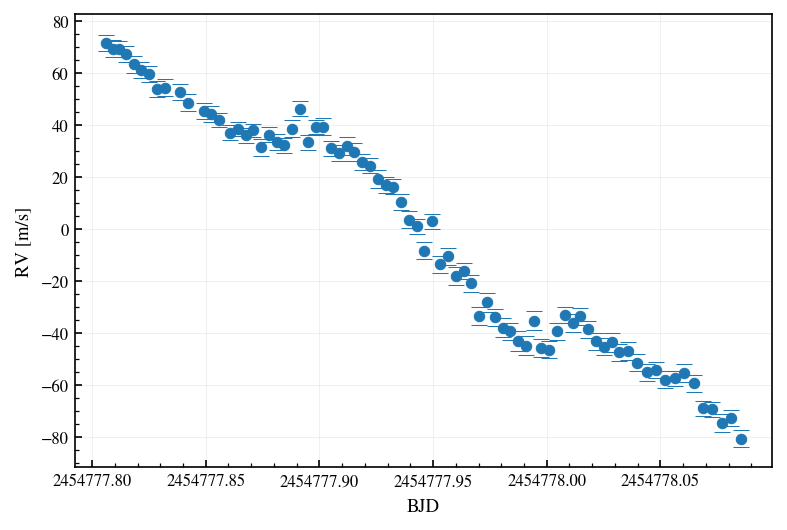

In [4]:
fig, ax = plt.subplots(dpi=150)
ax.errorbar(df.bjd.values,df.rv,df.e_rv,marker='o',lw=0,mew=0.5,capsize=4)
rmfit.utils.ax_apply_settings(ax,ticksize=8)
ax.set_xlabel('BJD')
ax.set_ylabel('RV [m/s]')

### Read priors from file 

In [5]:
f = '../data/example/03_hd17156/hd17156_priors.dat'
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)

Reading in priorfile from ../data/example/03_hd17156/hd17156_priors.dat
   prior          arg1        arg2     label description priortype  fixed
0     NP  2.454884e+06    0.000073     t0_p1       t0_p1     model  False
1     NP  2.121640e+01    0.000016      P_p1        P_p1     model  False
2     UP -1.800000e+02  180.000000    lam_p1      lam_p1     model  False
3     UP  0.000000e+00   30.000000     vsini       vsini     model  False
4     NP  8.782000e+01    0.200000    inc_p1      inc_p1     model  False
5     NP  7.270000e-02    0.000700      p_p1        p_p1     model  False
6     NP  2.600000e+01    3.000000      a_p1        a_p1     model  False
7     NP  3.900000e-01    0.050000        u1          u1     model  False
8     NP  3.700000e-01    0.050000        u2          u2     model  False
9     NP  6.801000e-01    0.001900    ecc_p1      ecc_p1     model  False
10    NP  1.216200e+02    0.420000  omega_p1    omega_p1     model  False
11    NP  3.900000e+00    0.500000     v

In [6]:
TF.minimize_PyDE(mcmc=False)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
      labels       centers         lower         upper            pv  center_dist
0      t0_p1  2.454884e+06  2.454884e+06  2.454884e+06  2.454884e+06     0.000022
1       P_p1  2.121640e+01  2.121632e+01  2.121648e+01  2.121640e+01    -0.000006
2     lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02  1.188858e+01   -11.888577
3      vsini  1.500000e+01  0.000000e+00  3.000000e+01  4.315316e+00    10.684684
4     inc_p1  8.782000e+01  8.682000e+01  8.882000e+01  8.790365e+01    -0.083646
5       p_p1  7.270000e-02  6.920000e-02  7.620000e-02  7.265883e-02     0.000041
6       a_p1  2.600000e+01  1.100000e+01  4.100000e+01  2.487445e+01     1.125546
7         u1  3.900000e-01  1.400000e-01  6.400000e-01  3.981205e-01    -0.008121
8         u2  3.700000e-01  1.200000e-01  6.200000e-01  3.709659e-01    -0.000966
9     ecc_p1  6.801000e-01  6.706000e-01  6.896000e-01  6.810325e-01    -0.000932
10  omega_p1  1.216200e+02  1.195200

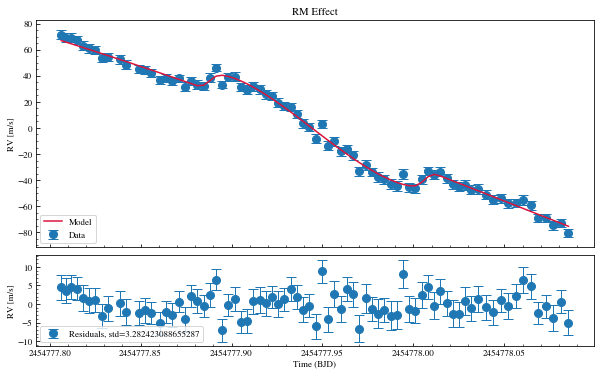

In [7]:
# plot best-fit
TF.plot_fit(TF.min_pv)

In [8]:
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)
TF.minimize_PyDE(mcmc=True,mc_iter=1000)

Reading in priorfile from ../data/example/03_hd17156/hd17156_priors.dat
   prior          arg1        arg2     label description priortype  fixed
0     NP  2.454884e+06    0.000073     t0_p1       t0_p1     model  False
1     NP  2.121640e+01    0.000016      P_p1        P_p1     model  False
2     UP -1.800000e+02  180.000000    lam_p1      lam_p1     model  False
3     UP  0.000000e+00   30.000000     vsini       vsini     model  False
4     NP  8.782000e+01    0.200000    inc_p1      inc_p1     model  False
5     NP  7.270000e-02    0.000700      p_p1        p_p1     model  False
6     NP  2.600000e+01    3.000000      a_p1        a_p1     model  False
7     NP  3.900000e-01    0.050000        u1          u1     model  False
8     NP  3.700000e-01    0.050000        u2          u2     model  False
9     NP  6.801000e-01    0.001900    ecc_p1      ecc_p1     model  False
10    NP  1.216200e+02    0.420000  omega_p1    omega_p1     model  False
11    NP  3.900000e+00    0.500000     v

No flatchain passed, defaulting to using full chains
Plotting curve with best-fit mcmc values


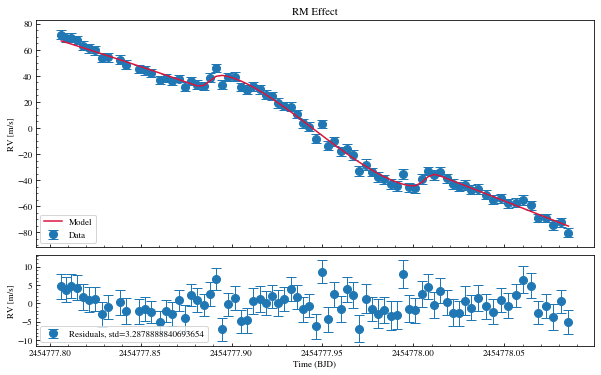

In [9]:
# Plot the MCMC fit
TF.plot_mcmc_fit()

In [10]:
# The min values are recorded in the following attribute
TF.min_pv_mcmc

array([2.45488403e+06, 2.12164010e+01, 1.02657158e+01, 4.30784042e+00,
       8.78562418e+01, 7.26358776e-02, 2.48428892e+01, 3.93621866e-01,
       3.68052012e-01, 6.80562785e-01, 1.21565229e+02, 3.86330231e+00,
       2.76086781e+02, 9.75716851e+01, 1.20900743e+00])

## Plot chains 

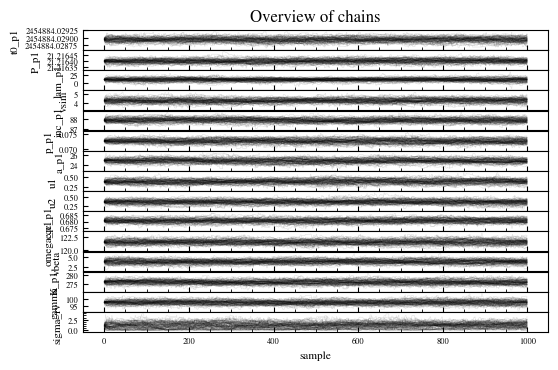

In [11]:
rmfit.mcmc_help.plot_chains(TF.sampler.chain,labels=TF.lpf.ps_vary.labels)

## Plot corner

In [12]:
# Make flatchain and posteriors
burnin_index = 200
chains_after_burnin = TF.sampler.chain[:,burnin_index:,:]
flatchain = chains_after_burnin.reshape((-1,len(TF.lpf.ps_vary.priors)))
df_post = pd.DataFrame(flatchain,columns=TF.lpf.ps_vary.labels)
df_post

,t0_p1,P_p1,lam_p1,vsini,inc_p1,p_p1,a_p1,u1,u2,ecc_p1,omega_p1,vbeta,K_p1,gamma,sigma_rv
0,2.454884e+06,21.216402,13.521141,4.119947,87.600804,0.072836,23.836121,0.421474,0.376857,0.680282,121.150297,2.836964,275.567924,96.093778,0.146144
1,2.454884e+06,21.216402,13.524167,4.120123,87.601075,0.072835,23.836843,0.421444,0.376821,0.680283,121.150589,2.837303,275.568169,96.094604,0.146252
2,2.454884e+06,21.216402,13.524167,4.120123,87.601075,0.072835,23.836843,0.421444,0.376821,0.680283,121.150589,2.837303,275.568169,96.094604,0.146252
3,2.454884e+06,21.216402,13.524167,4.120123,87.601075,0.072835,23.836843,0.421444,0.376821,0.680283,121.150589,2.837303,275.568169,96.094604,0.146252
4,2.454884e+06,21.216401,14.172815,4.183964,87.657513,0.072747,23.997996,0.423610,0.357195,0.680301,121.312519,3.014328,275.670313,96.580806,0.381428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2.454884e+06,21.216387,5.843255,4.347608,87.994238,0.071731,24.608389,0.409627,0.373896,0.681063,120.801545,3.858202,274.120271,94.303602,1.018185
79996,2.454884e+06,21.216387,6.238780,4.338379,87.994719,0.071803,24.649272,0.406173,0.374995,0.681249,120.948857,3.759471,274.217185,94.807384,1.065544
79997,2.454884e+06,21.216387,6.238780,4.338379,87.994719,0.071803,24.649272,0.406173,0.374995,0.681249,120.948857,3.759471,274.217185,94.807384,1.065544
79998,2.454884e+06,21.216384,4.731953,4.355367,87.991141,0.071752,24.576704,0.402299,0.371530,0.681492,120.931460,3.726221,274.175094,94.590105,1.034604


In [13]:
# Assess convergence, should be close to 1 (usually within a few percent, if not, then rerun MCMC with more steps)
# This example for example would need a lot more steps, but keeping steps fewer for a quick minimal example
# Usually good to let it run for 10000 - 20000 steps for a 'production run'
rmfit.mcmc_help.gelman_rubin(chains_after_burnin)

array([1.15210523, 1.14420287, 1.13690402, 1.14078877, 1.16313152,
       1.16244515, 1.14089833, 1.11813468, 1.12578991, 1.15373369,
       1.1402674 , 1.16371293, 1.12155231, 1.13786749, 1.12606423])

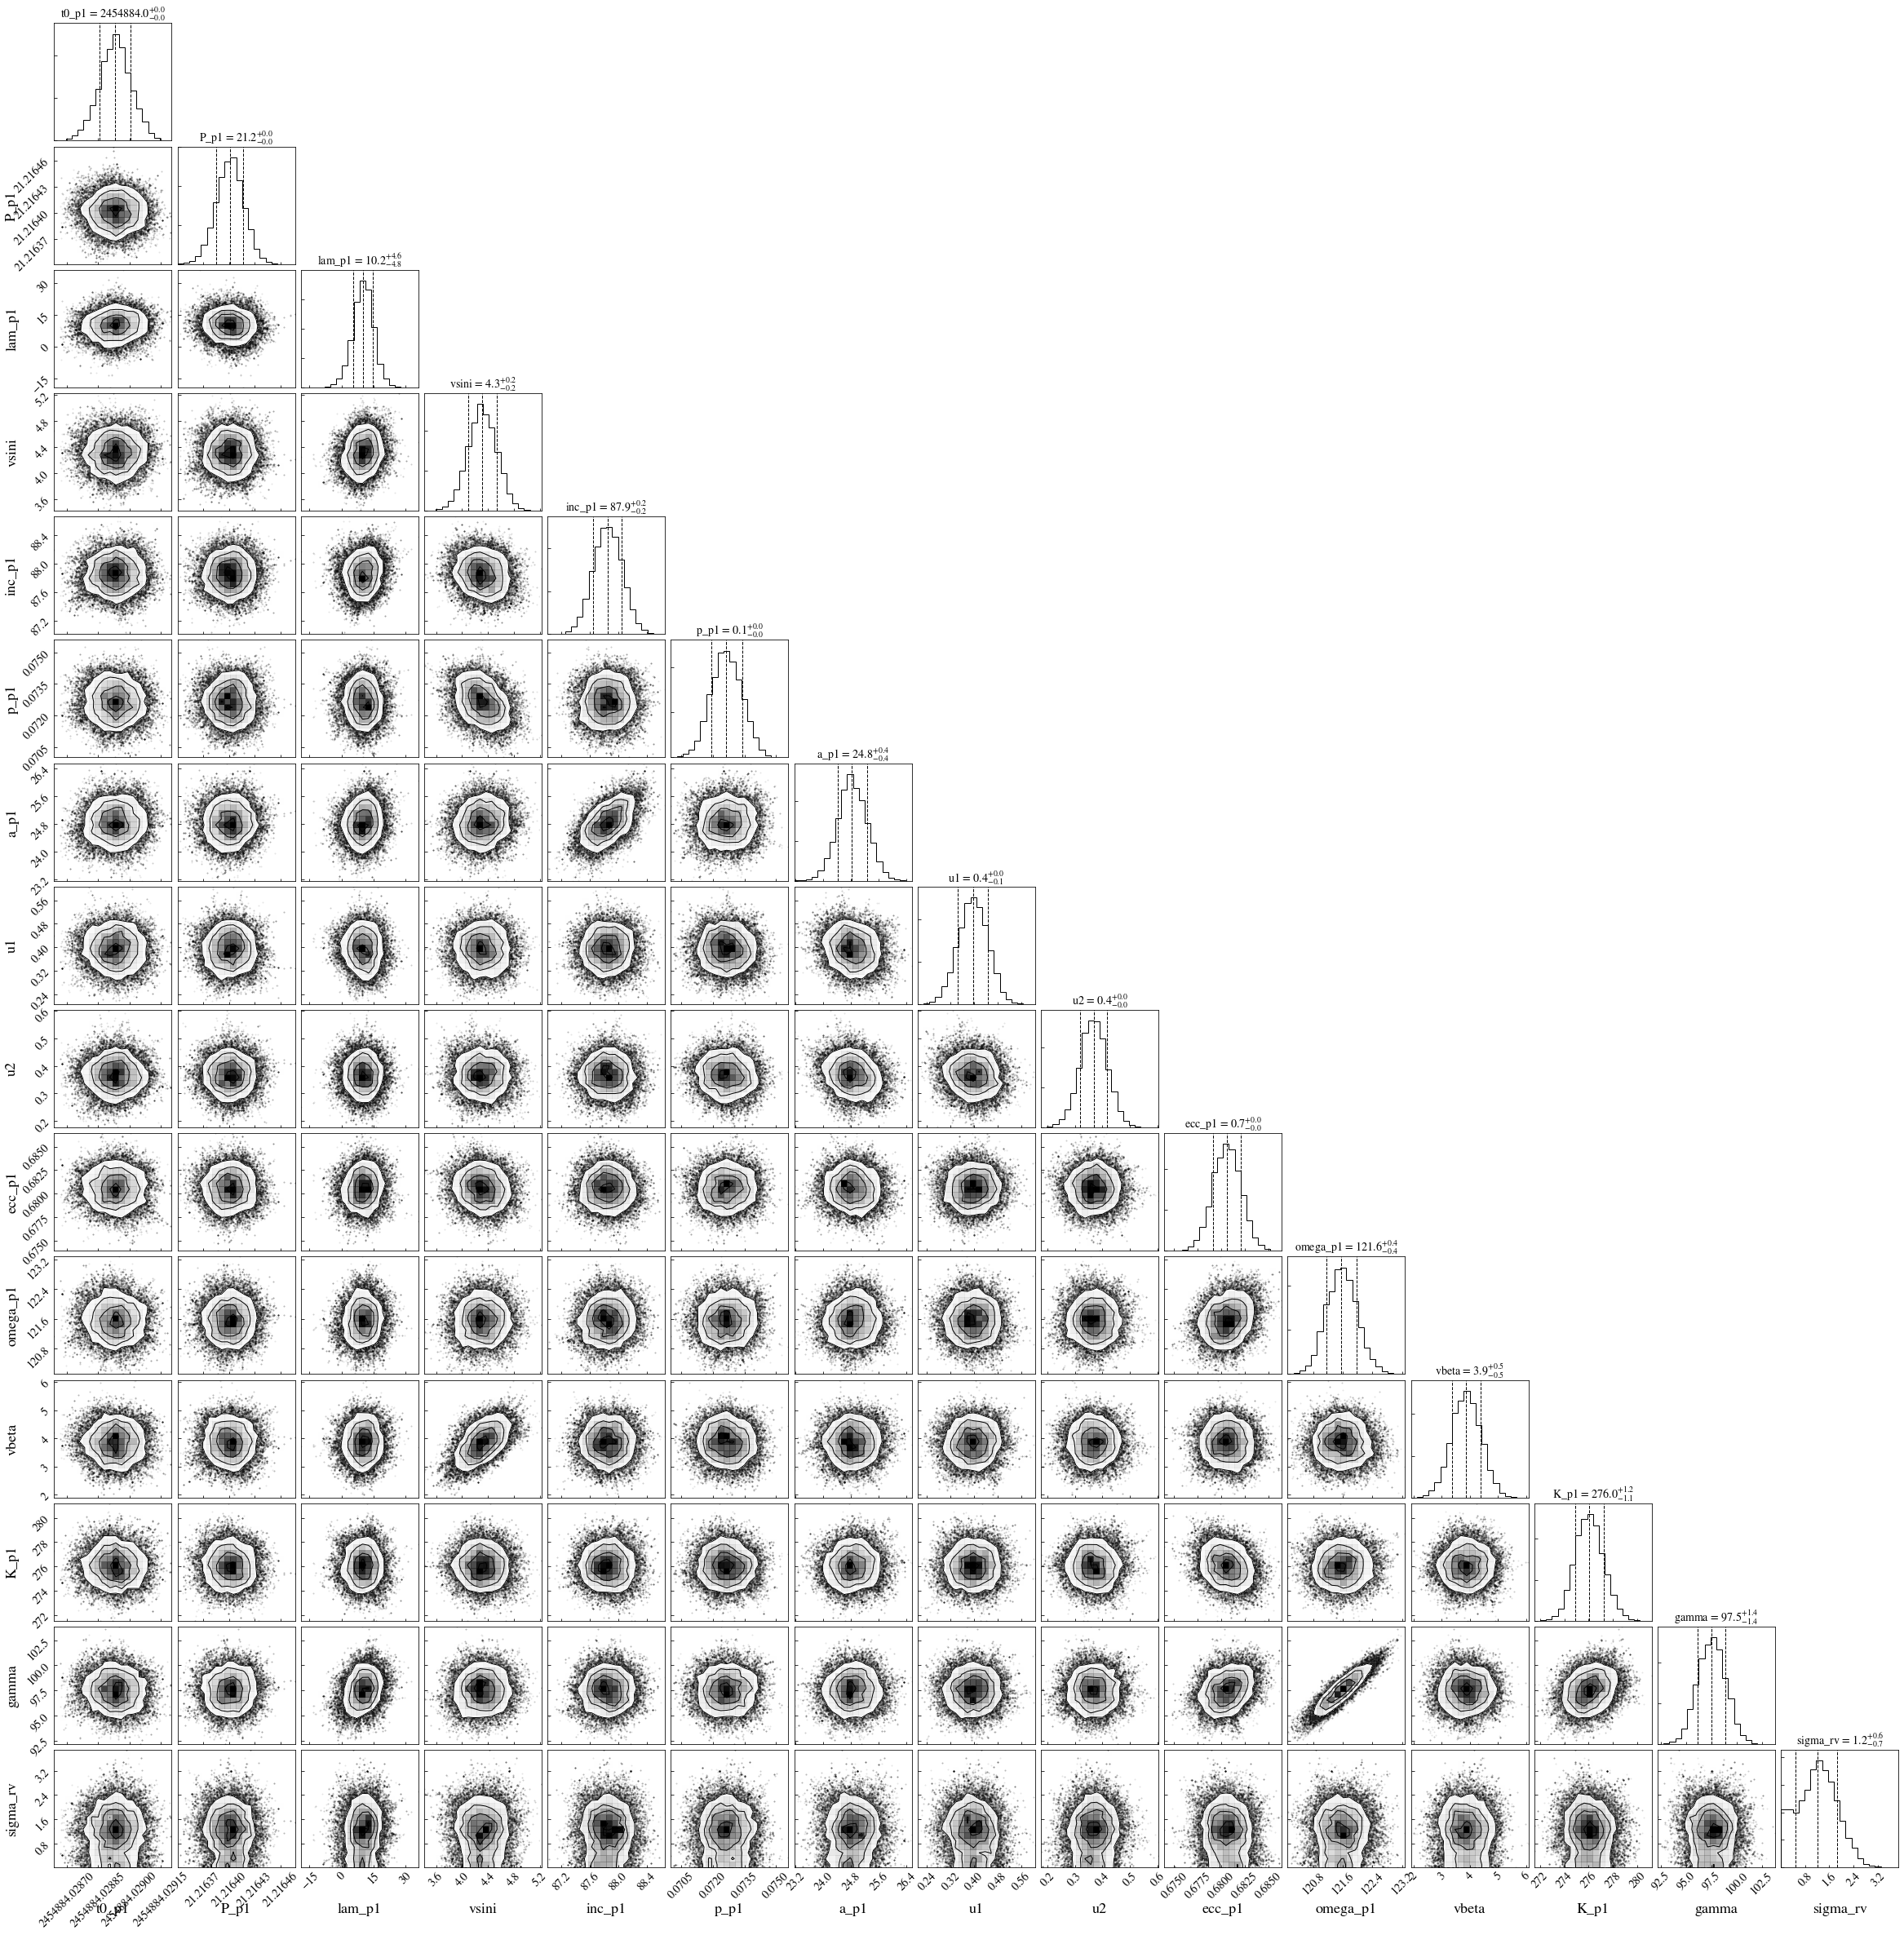

In [14]:
# Plot corner plot
fig = rmfit.mcmc_help.plot_corner(chains_after_burnin,
       show_titles=True,labels=np.array(TF.lpf.ps_vary.descriptions),title_fmt='.1f',xlabcord=(0.5, -0.2))

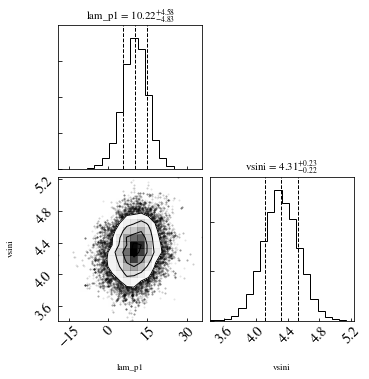

In [15]:
# Narrow down on the lambda and vsini
import corner
fig = corner.corner(df_post[['lam_p1','vsini']],show_titles=True,quantiles=[0.18,0.5,0.84])

In [16]:
# Print median values
df_medvals = TF.get_mean_values_mcmc_posteriors(df_post.values)
df_medvals

,medvals,minus,plus,values,Labels,Description
0,2.454884e+06,0.000075,0.000075,$2454884.028931_{-0.00007}^{+0.00007}$,t0_p1,t0_p1
0,2.121640e+01,0.000016,0.000015,$21.216401_{-0.00002}^{+0.00002}$,P_p1,P_p1
0,1.021966e+01,4.834353,4.578379,$10.2_{-4.8}^{+4.6}$,lam_p1,lam_p1
0,4.310017e+00,0.218922,0.225776,$4.31_{-0.22}^{+0.23}$,vsini,vsini
0,8.785005e+01,0.200947,0.202302,$87.85_{-0.20}^{+0.20}$,inc_p1,inc_p1
0,7.263879e-02,0.000727,0.000754,$0.07264_{-0.00073}^{+0.00075}$,p_p1,p_p1
0,2.482373e+01,0.405095,0.438232,$24.82_{-0.41}^{+0.44}$,a_p1,a_p1
0,3.952556e-01,0.050500,0.049816,$0.395_{-0.051}^{+0.050}$,u1,u1
0,3.679645e-01,0.048618,0.048697,$0.368_{-0.049}^{+0.049}$,u2,u2
0,6.805803e-01,0.001479,0.001505,$0.6806_{-0.0015}^{+0.0015}$,ecc_p1,ecc_p1


# Plotting resulting MCMC fit 

Sampling, i= 0
Sampling, i= 100
Sampling, i= 200
Sampling, i= 300


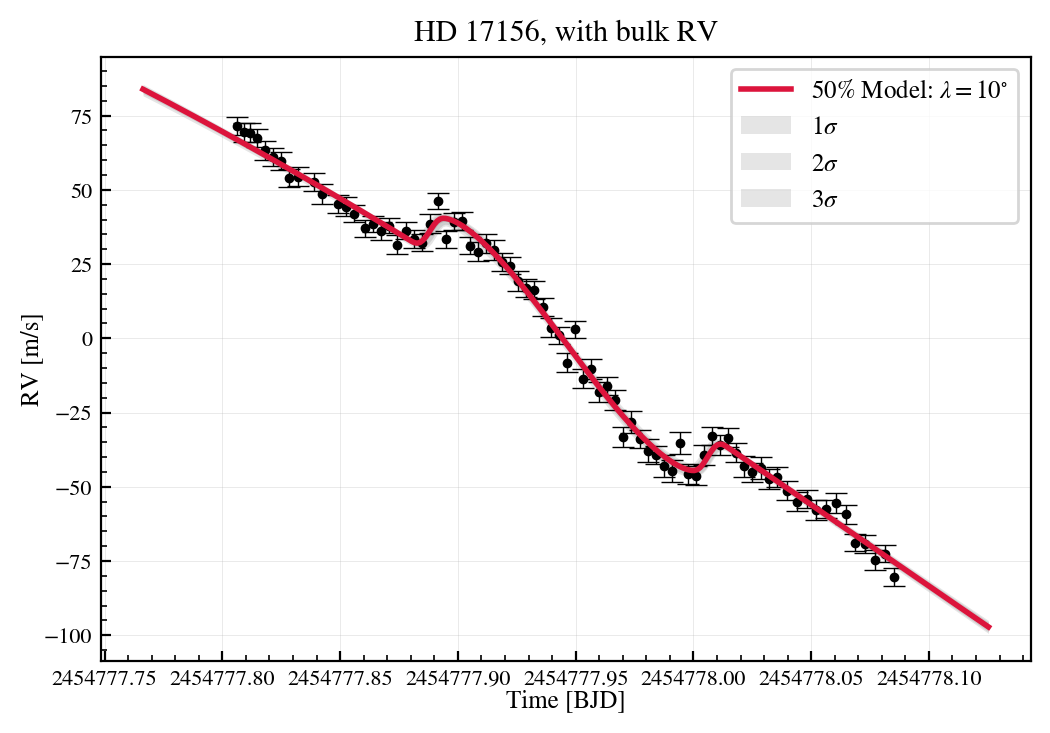

In [17]:
TITLE = 'HD 17156, with bulk RV'
NUMMODELS = 400
shadecolor="black"

###################
times1 = np.linspace(TF.lpf.data['x'][0]-0.02,TF.lpf.data['x'][-1]+0.02,500)
pv_50 = np.percentile(flatchain,[50],axis=0)[0]
t1_mod = np.linspace(times1.min()-0.02,times1.max()+0.02,300)
rv_50 = TF.lpf.compute_total_model(pv_50,t1_mod)

# Plot random samples
fig, ax = plt.subplots(dpi=200)

#################
# Plot data
#################
markercolor="black"
ax.errorbar(TF.lpf.data['x'],TF.lpf.data['y'],TF.lpf.data['error'],
            marker='o',elinewidth=0.5,capsize=4,lw=0,mew=0.5,color=markercolor,markersize=3)
ax.plot(t1_mod,rv_50,color="crimson",
        label=r'50% Model: $\lambda=${:0.0f}'.format(pv_50[2])+'$^{\circ}$',lw=2.,zorder=10)

#################
# Sample models
#################
mmodel1 = []
for i in range(NUMMODELS):
    if i%100 == 0: print("Sampling, i=",i)
    idx = np.random.randint(0, flatchain.shape[0])
    m1 = TF.lpf.compute_total_model(flatchain[idx],times=t1_mod)
    mmodel1.append(m1)
mmodel1 = np.array(mmodel1)
#################

ax.fill_between(t1_mod,np.quantile(mmodel1,0.16,axis=0),np.quantile(mmodel1,0.84,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='1$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.02,axis=0),np.quantile(mmodel1,0.98,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='2$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.0015,axis=0),np.quantile(mmodel1,0.9985,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='3$\sigma$',zorder=-1)
ax.legend(loc='upper right')
ax.set_xlabel('Time [BJD]',labelpad=0)
ax.set_ylabel('RV [m/s]',labelpad=0)
ax.set_title(TITLE)
rmfit.utils.ax_apply_settings(ax,ticksize=8)